In [19]:
import numpy as np

# Define a simple function to compute the sum of an array
def my_sum(arr):
    return np.sum(arr)

# Create a 2D array
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Apply the function along the rows (axis=1)
result = np.apply_along_axis(my_sum, 1, arr)

print(result)

[ 6 15 24]


In [20]:

import random
import pylab

''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

#
# PROBLEM 1
#
class SimpleVirus(object):

    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        if random.uniform(0, 1) <= self.clearProb:
            return True
        return False

    
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """

        if random.uniform(0, 1) <= self.maxBirthProb * (1 - popDensity):
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        raise NoChildException



class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.viruses)


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
        for virus in self.viruses[:]:
            if virus.doesClear():
                self.viruses.remove(virus)

        popDensity = self.getTotalPop() / self.getMaxPop()
        
        for virus in self.viruses[:]:
            try:
                self.viruses.append(virus.reproduce(popDensity))
            except NoChildException:
                pass



#
# PROBLEM 2
#
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import numpy as np
import pylab
import random
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    totalPopArr = np.zeros((numTrials, 300))
    for trial in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for v in range(numViruses)]
        patient = Patient(viruses, maxPop)
        currPopList = []
        
        for i in range(300):
            patient.update()
            currPopList.append(patient.getTotalPop())
        
        totalPopArr[trial, :] = np.array(currPopList)
        
    avgPopArr = np.apply_along_axis(np.mean, 0, totalPopArr)
    
    # Plotting
    pylab.plot(avgPopArr, label = "SimpleVirus")
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()

numViruses = 100

maxPop (maximum sustainable virus population) = 1000

maxBirthProb (maximum reproduction probability for a virus particle) = 0.1

clearProb (maximum clearance probability for a virus particle) = 0.05

numTrials = 50

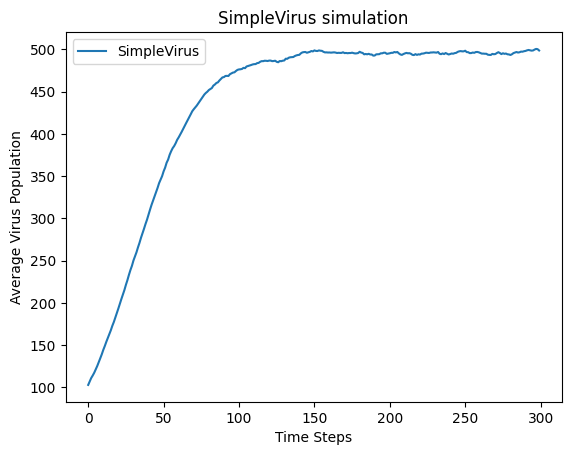

In [23]:
numViruses = 100
maxPop = 1000
maxBirthProb = 0.1
clearProb = 0.05
numTrials = 100

simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials)

In [28]:
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    totalPopDict = {}
    for trial in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for v in range(numViruses)]
        patient = Patient(viruses, maxPop)
        currPopList = []
        
        for i in range(300):
            patient.update()
            try:
                totalPopDict[i].append(patient.getTotalPop())
            except KeyError:
                totalPopDict[i] = [patient.getTotalPop()]
                
    avgPopArr = [sum(totalPopDict[i]) / len(totalPopDict[i]) for i in totalPopDict.keys()]
    
    # Plotting
    pylab.plot(avgPopArr, label = "SimpleVirus")
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()

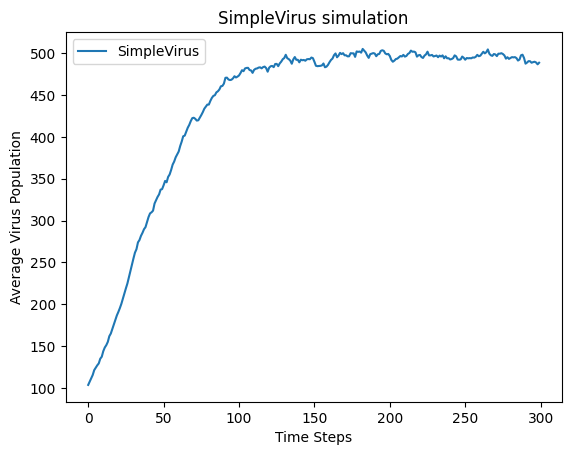

In [29]:
numViruses = 100
maxPop = 1000
maxBirthProb = 0.1
clearProb = 0.05
numTrials = 10

simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials)

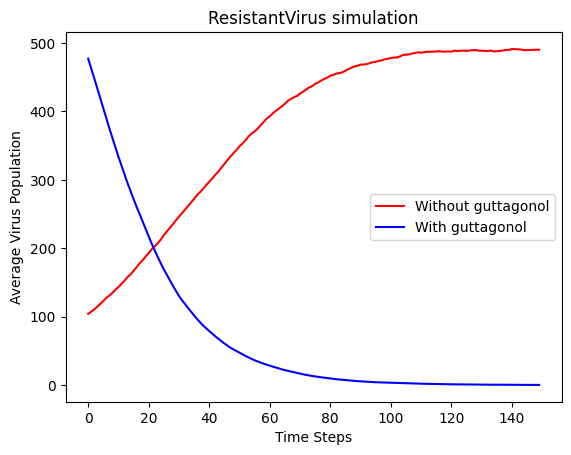

In [1]:
# Problem Set 3: Simulating the Spread of Disease and Virus Population Dynamics 

import random
import pylab

''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

#
# PROBLEM 1
#
class SimpleVirus(object):

    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        if random.uniform(0, 1) <= self.clearProb:
            return True
        return False

    
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """

        if random.uniform(0, 1) <= self.maxBirthProb * (1 - popDensity):
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        raise NoChildException



class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.viruses)


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
        for virus in self.viruses[:]:
            if virus.doesClear():
                self.viruses.remove(virus)

        popDensity = self.getTotalPop() / self.getMaxPop()
        
        for virus in self.viruses[:]:
            try:
                self.viruses.append(virus.reproduce(popDensity))
            except NoChildException:
                pass


#
# PROBLEM 2
#
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import numpy as np
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    totalPopArr = np.zeros((numTrials, 300))
    for trial in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for v in range(numViruses)]
        patient = Patient(viruses, maxPop)
        currPopList = []
        
        for i in range(300):
            patient.update()
            currPopList.append(patient.getTotalPop())
            
        totalPopArr[trial, :] = np.array(currPopList)   
    avgPopArr = np.apply_along_axis(np.mean, 0, totalPopArr)
    
    # Plotting
    pylab.plot(avgPopArr, label = "SimpleVirus")
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()


#
# PROBLEM 3
#
class ResistantVirus(SimpleVirus):
    """
    Representation of a virus which can have drug resistance.
    """   

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Initialize a ResistantVirus instance, saves all parameters as attributes
        of the instance.

        maxBirthProb: Maximum reproduction probability (a float between 0-1)       

        clearProb: Maximum clearance probability (a float between 0-1).

        resistances: A dictionary of drug names (strings) mapping to the state
        of this virus particle's resistance (either True or False) to each drug.
        e.g. {'guttagonol':False, 'srinol':False}, means that this virus
        particle is resistant to neither guttagonol nor srinol.

        mutProb: Mutation probability for this virus particle (a float). This is
        the probability of the offspring acquiring or losing resistance to a drug.
        """
        super().__init__(maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb


    def getResistances(self):
        """
        Returns the resistances for this virus.
        """
        return self.resistances

    def getMutProb(self):
        """
        Returns the mutation probability for this virus.
        """
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Get the state of this virus particle's resistance to a drug. This method
        is called by getResistPop() in TreatedPatient to determine how many virus
        particles have resistance to a drug.       

        drug: The drug (a string)

        returns: True if this virus instance is resistant to the drug, False
        otherwise.
        """
        try:
            value = self.resistances[drug]
        except KeyError:
            value = False
        return value


    def reproduce(self, popDensity, activeDrugs):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A virus particle will only reproduce if it is resistant to ALL the drugs
        in the activeDrugs list. For example, if there are 2 drugs in the
        activeDrugs list, and the virus particle is resistant to 1 or no drugs,
        then it will NOT reproduce.

        Hence, if the virus is resistant to all drugs
        in activeDrugs, then the virus reproduces with probability:      

        self.maxBirthProb * (1 - popDensity).                       

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring ResistantVirus (which has the same
        maxBirthProb and clearProb values as its parent). The offspring virus
        will have the same maxBirthProb, clearProb, and mutProb as the parent.

        For each drug resistance trait of the virus (i.e. each key of
        self.resistances), the offspring has probability 1-mutProb of
        inheriting that resistance trait from the parent, and probability
        mutProb of switching that resistance trait in the offspring.       

        For example, if a virus particle is resistant to guttagonol but not
        srinol, and self.mutProb is 0.1, then there is a 10% chance that
        that the offspring will lose resistance to guttagonol and a 90%
        chance that the offspring will be resistant to guttagonol.
        There is also a 10% chance that the offspring will gain resistance to
        srinol and a 90% chance that the offspring will not be resistant to
        srinol.

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population       

        activeDrugs: a list of the drug names acting on this virus particle
        (a list of strings).

        returns: a new instance of the ResistantVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        newResist = self.resistances
        if [self.resistances[drug] for drug in activeDrugs] == [True] * len(activeDrugs) and random.uniform(0, 1) <= self.maxBirthProb * (1 - popDensity):
            for drug, value in self.resistances.items():
                if random.uniform(0, 1) <= (1 - self.mutProb):
                    newResist[drug] = value
                else:
                    newResist[drug] = not value
            return ResistantVirus(self.maxBirthProb, self.clearProb, newResist, self.mutProb)
        raise NoChildException

            

class TreatedPatient(Patient):
    """
    Representation of a patient. The patient is able to take drugs and his/her
    virus population can acquire resistance to the drugs he/she takes.
    """

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of drugs being administered
        (which should initially include no drugs).              

        viruses: The list representing the virus population (a list of
        virus instances)

        maxPop: The  maximum virus population for this patient (an integer)
        """
        super().__init__(viruses, maxPop)
        self.drugs = []
        

    def addPrescription(self, newDrug):
        """
        Administer a drug to this patient. After a prescription is added, the
        drug acts on the virus population for all subsequent time steps. If the
        newDrug is already prescribed to this patient, the method has no effect.

        newDrug: The name of the drug to administer to the patient (a string).

        postcondition: The list of drugs being administered to a patient is updated
        """
        if newDrug not in self.drugs:
            self.drugs.append(newDrug)


    def getPrescriptions(self):
        """
        Returns the drugs that are being administered to this patient.

        returns: The list of drug names (strings) being administered to this
        patient.
        """
        return self.drugs


    def getResistPop(self, drugResist):
        """
        Get the population of virus particles resistant to the drugs listed in
        drugResist.       

        drugResist: Which drug resistances to include in the population (a list
        of strings - e.g. ['guttagonol'] or ['guttagonol', 'srinol'])

        returns: The population of viruses (an integer) with resistances to all
        drugs in the drugResist list.
        """
        return len([v for v in self.viruses if [v.isResistantTo(drug) for drug in drugResist] == [True]*len(drugResist)])


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute these actions in order:

        - Determine whether each virus particle survives and update the list of
          virus particles accordingly

        - The current population density is calculated. This population density
          value is used until the next call to update().

        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.
          The list of drugs being administered should be accounted for in the
          determination of whether each virus particle reproduces.

        returns: The total virus population at the end of the update (an
        integer)
        """
        self.viruses = [v for v in self.viruses[:] if not v.doesClear()]
        popDensity = self.getTotalPop() / self.getMaxPop()
        rvir = [v for v in self.viruses if [v.isResistantTo(drug) for drug in self.drugs] == [True]*len(self.drugs)]
        for virus in rvir:
            try:
                self.viruses.append(virus.reproduce(popDensity, self.drugs))
            except NoChildException:
                pass
        



#
# PROBLEM 4
#
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances,
                       mutProb, numTrials):
    """
    Runs simulations and plots graphs for problem 5.

    For each of numTrials trials, instantiates a patient, runs a simulation for
    150 timesteps, adds guttagonol, and runs the simulation for an additional
    150 timesteps.  At the end plots the average virus population size
    (for both the total virus population and the guttagonol-resistant virus
    population) as a function of time.

    numViruses: number of ResistantVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: maximum clearance probability (a float between 0-1)
    resistances: a dictionary of drugs that each ResistantVirus is resistant to
                 (e.g., {'guttagonol': False})
    mutProb: mutation probability for each ResistantVirus particle
             (a float between 0-1). 
    numTrials: number of simulation runs to execute (an integer)
    
    """
    totalPopDict_nodrug = {}
    totalPopDict_gut = {}
    for trial in range(numTrials):
        viruses = [ResistantVirus(maxBirthProb, clearProb, resistances, mutProb) for v in range(numViruses)]
        patient = TreatedPatient(viruses, maxPop)
        
        for i in range(150):
            patient.update()
            try:
                totalPopDict_nodrug[i].append(patient.getTotalPop())
            except KeyError:
                totalPopDict_nodrug[i] = [patient.getTotalPop()]
        
        patient.addPrescription("guttagonol")       
        for i in range(150):
            patient.update()
            try:
                totalPopDict_gut[i].append(patient.getTotalPop())
            except KeyError:
                totalPopDict_gut[i] = [patient.getTotalPop()]
                
    avgPopArr_nodrug = [sum(totalPopDict_nodrug[i]) / len(totalPopDict_nodrug[i]) for i in totalPopDict_nodrug.keys()]
    avgPopArr_gut = [sum(totalPopDict_gut[i]) / len(totalPopDict_gut[i]) for i in totalPopDict_gut.keys()]
    
    
    
    # Plotting
    pylab.plot(avgPopArr_nodrug, label = "Without guttagonol", color="red")
    pylab.plot(avgPopArr_gut, label = "With guttagonol", color="blue")
    pylab.title("ResistantVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()

numViruses = 100
maxPop = 1000
maxBirthProb = 0.1
clearProb = 0.05
resistances = {'guttagonol': False}
mutProb = 0.005
numTrials = 100

simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances, mutProb, numTrials)

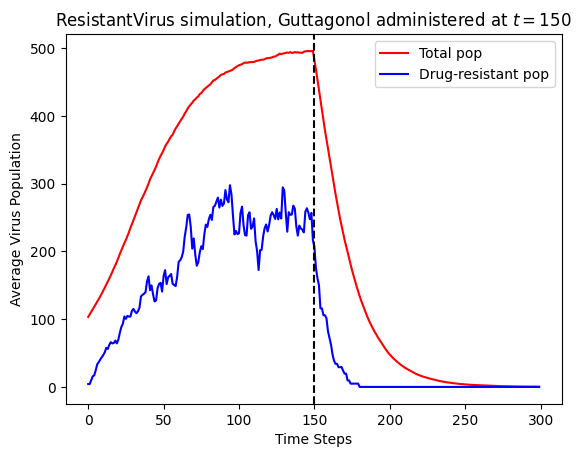

In [9]:
# Problem Set 3: Simulating the Spread of Disease and Virus Population Dynamics 

import random
import pylab

''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

#
# PROBLEM 1
#
class SimpleVirus(object):

    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        if random.uniform(0, 1) <= self.clearProb:
            return True
        return False

    
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """

        if random.uniform(0, 1) <= self.maxBirthProb * (1 - popDensity):
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        raise NoChildException



class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.viruses)


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
        for virus in self.viruses[:]:
            if virus.doesClear():
                self.viruses.remove(virus)

        popDensity = self.getTotalPop() / self.getMaxPop()
        
        for virus in self.viruses[:]:
            try:
                self.viruses.append(virus.reproduce(popDensity))
            except NoChildException:
                pass


#
# PROBLEM 2
#
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import numpy as np
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    totalPopArr = np.zeros((numTrials, 300))
    for trial in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for v in range(numViruses)]
        patient = Patient(viruses, maxPop)
        currPopList = []
        
        for i in range(300):
            patient.update()
            currPopList.append(patient.getTotalPop())
            
        totalPopArr[trial, :] = np.array(currPopList)   
    avgPopArr = np.apply_along_axis(np.mean, 0, totalPopArr)
    
    # Plotting
    pylab.plot(avgPopArr, label = "SimpleVirus")
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()


#
# PROBLEM 3
#
class ResistantVirus(SimpleVirus):
    """
    Representation of a virus which can have drug resistance.
    """   

    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Initialize a ResistantVirus instance, saves all parameters as attributes
        of the instance.

        maxBirthProb: Maximum reproduction probability (a float between 0-1)       

        clearProb: Maximum clearance probability (a float between 0-1).

        resistances: A dictionary of drug names (strings) mapping to the state
        of this virus particle's resistance (either True or False) to each drug.
        e.g. {'guttagonol':False, 'srinol':False}, means that this virus
        particle is resistant to neither guttagonol nor srinol.

        mutProb: Mutation probability for this virus particle (a float). This is
        the probability of the offspring acquiring or losing resistance to a drug.
        """
        super().__init__(maxBirthProb, clearProb)
        self.resistances = resistances
        self.mutProb = mutProb


    def getResistances(self):
        """
        Returns the resistances for this virus.
        """
        return self.resistances

    def getMutProb(self):
        """
        Returns the mutation probability for this virus.
        """
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Get the state of this virus particle's resistance to a drug. This method
        is called by getResistPop() in TreatedPatient to determine how many virus
        particles have resistance to a drug.       

        drug: The drug (a string)

        returns: True if this virus instance is resistant to the drug, False
        otherwise.
        """
        try:
            value = self.resistances[drug]
        except KeyError:
            value = False
        return value


    def reproduce(self, popDensity, activeDrugs):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the TreatedPatient class.

        A virus particle will only reproduce if it is resistant to ALL the drugs
        in the activeDrugs list. For example, if there are 2 drugs in the
        activeDrugs list, and the virus particle is resistant to 1 or no drugs,
        then it will NOT reproduce.

        Hence, if the virus is resistant to all drugs
        in activeDrugs, then the virus reproduces with probability:      

        self.maxBirthProb * (1 - popDensity).                       

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring ResistantVirus (which has the same
        maxBirthProb and clearProb values as its parent). The offspring virus
        will have the same maxBirthProb, clearProb, and mutProb as the parent.

        For each drug resistance trait of the virus (i.e. each key of
        self.resistances), the offspring has probability 1-mutProb of
        inheriting that resistance trait from the parent, and probability
        mutProb of switching that resistance trait in the offspring.       

        For example, if a virus particle is resistant to guttagonol but not
        srinol, and self.mutProb is 0.1, then there is a 10% chance that
        that the offspring will lose resistance to guttagonol and a 90%
        chance that the offspring will be resistant to guttagonol.
        There is also a 10% chance that the offspring will gain resistance to
        srinol and a 90% chance that the offspring will not be resistant to
        srinol.

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population       

        activeDrugs: a list of the drug names acting on this virus particle
        (a list of strings).

        returns: a new instance of the ResistantVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        newResist = self.resistances
        if [self.resistances[drug] for drug in activeDrugs] == [True] * len(activeDrugs) and random.uniform(0, 1) <= self.maxBirthProb * (1 - popDensity):
            for drug, value in self.resistances.items():
                if random.uniform(0, 1) <= (1 - self.mutProb):
                    newResist[drug] = value
                else:
                    newResist[drug] = not value
            return ResistantVirus(self.maxBirthProb, self.clearProb, newResist, self.mutProb)
        raise NoChildException

            

class TreatedPatient(Patient):
    """
    Representation of a patient. The patient is able to take drugs and his/her
    virus population can acquire resistance to the drugs he/she takes.
    """

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of drugs being administered
        (which should initially include no drugs).              

        viruses: The list representing the virus population (a list of
        virus instances)

        maxPop: The  maximum virus population for this patient (an integer)
        """
        super().__init__(viruses, maxPop)
        self.drugs = []
        

    def addPrescription(self, newDrug):
        """
        Administer a drug to this patient. After a prescription is added, the
        drug acts on the virus population for all subsequent time steps. If the
        newDrug is already prescribed to this patient, the method has no effect.

        newDrug: The name of the drug to administer to the patient (a string).

        postcondition: The list of drugs being administered to a patient is updated
        """
        if newDrug not in self.drugs:
            self.drugs.append(newDrug)


    def getPrescriptions(self):
        """
        Returns the drugs that are being administered to this patient.

        returns: The list of drug names (strings) being administered to this
        patient.
        """
        return self.drugs


    def getResistPop(self, drugResist):
        """
        Get the population of virus particles resistant to the drugs listed in
        drugResist.       

        drugResist: Which drug resistances to include in the population (a list
        of strings - e.g. ['guttagonol'] or ['guttagonol', 'srinol'])

        returns: The population of viruses (an integer) with resistances to all
        drugs in the drugResist list.
        """
        return len([v for v in self.viruses if [v.isResistantTo(drug) for drug in drugResist] == [True]*len(drugResist)])


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute these actions in order:

        - Determine whether each virus particle survives and update the list of
          virus particles accordingly

        - The current population density is calculated. This population density
          value is used until the next call to update().

        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.
          The list of drugs being administered should be accounted for in the
          determination of whether each virus particle reproduces.

        returns: The total virus population at the end of the update (an
        integer)
        """
        self.viruses = [v for v in self.viruses[:] if not v.doesClear()]
        popDensity = self.getTotalPop() / self.getMaxPop()
        rvir = [v for v in self.viruses if [v.isResistantTo(drug) for drug in self.drugs] == [True]*len(self.drugs)]
        for virus in rvir:
            try:
                self.viruses.append(virus.reproduce(popDensity, self.drugs))
            except NoChildException:
                pass
        



#
# PROBLEM 4
#
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances,
                       mutProb, numTrials):
    """
    Runs simulations and plots graphs for problem 5.

    For each of numTrials trials, instantiates a patient, runs a simulation for
    150 timesteps, adds guttagonol, and runs the simulation for an additional
    150 timesteps.  At the end plots the average virus population size
    (for both the total virus population and the guttagonol-resistant virus
    population) as a function of time.

    numViruses: number of ResistantVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: maximum clearance probability (a float between 0-1)
    resistances: a dictionary of drugs that each ResistantVirus is resistant to
                 (e.g., {'guttagonol': False})
    mutProb: mutation probability for each ResistantVirus particle
             (a float between 0-1). 
    numTrials: number of simulation runs to execute (an integer)
    
    """
    totalPopDict = {}
    gutResistPopDict = {}
    for trial in range(numTrials):
        viruses = [ResistantVirus(maxBirthProb, clearProb, resistances, mutProb) for v in range(numViruses)]
        patient = TreatedPatient(viruses, maxPop)
        
        for i in range(150):
            patient.update()
            try:
                totalPopDict[i].append(patient.getTotalPop())
                gutResistPopDict[i].append(patient.getResistPop(["guttagonol"]))
            except KeyError:
                totalPopDict[i] = [patient.getTotalPop()]
                gutResistPopDict[i] = [patient.getResistPop(["guttagonol"])]
        
        patient.addPrescription("guttagonol")       
        for i in range(150, 300):
            patient.update()
            try:
                totalPopDict[i].append(patient.getTotalPop())
                gutResistPopDict[i].append(patient.getResistPop(["guttagonol"]))
            except KeyError:
                totalPopDict[i] = [patient.getTotalPop()]
                gutResistPopDict[i] = [patient.getResistPop(["guttagonol"])]
                
    avgTotalPop = [sum(totalPopDict[i]) / len(totalPopDict[i]) for i in totalPopDict.keys()]
    avgResistPop = [sum(gutResistPopDict[i]) / len(gutResistPopDict[i]) for i in gutResistPopDict.keys()]
    
    
    
    # Plotting
    pylab.plot(avgTotalPop, label = "Total pop", color="red")
    pylab.plot(avgResistPop, label = "Drug-resistant pop", color="blue")
    pylab.axvline(150, color="black", linestyle="--")
    pylab.title("ResistantVirus simulation, Guttagonol administered at $t=150$")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "upper right")
    pylab.show()

numViruses = 100
maxPop = 1000
maxBirthProb = 0.1
clearProb = 0.05
resistances = {'guttagonol': False}
mutProb = 0.005
numTrials = 100

simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances, mutProb, numTrials)